In [57]:
import paho.mqtt.client as mqtt
client = mqtt.Client("pcphonecolour")
client.connect("test.mosquitto.org")

0

0

In [42]:
import pandas
client.reconnect()

kblank    = "0 0 0 0"
kleft     = "1 0 0 0"
kright    = "0 0 1 0"
kup       = "0 1 0 0"
kdown     = "0 0 0 1"
kleftup   = "1 1 0 0"
krightup  = "0 1 1 0"
combis = [ kleft, kright, kup, kdown, kleftup, krightup, kblank ]

client.reconnect()
client.subscribe("miniwheels2/lux")
client.loop_start()

dfs = [ ]
for ks in combis:
    print("color", ks)
    client.publish("miniwheels2/wheels", ks)
    time.sleep(0.5)
    luxrecords.clear()
    time.sleep(3)
    df = pandas.DataFrame.from_records(luxrecords, columns=["br", "ir"])
    client.publish("miniwheels2/wheels", kblank)
    dfs.append(df)
    #break
client.loop_stop()


color 1 0 0 0
color 0 0 1 0
color 0 1 0 0
color 0 0 0 1
color 1 1 0 0
color 0 1 1 0
color 0 0 0 0


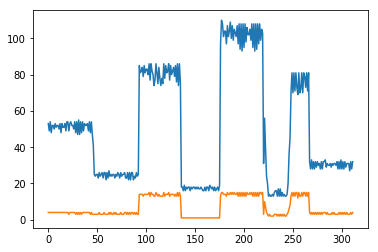

In [56]:
plt.plot(sum((list(df.br)  for df in dfs), []))
plt.plot(sum((list(df.ir)  for df in dfs), []))

In [74]:
luxrecords = [ ]
def recmessage(client, userdata, message):
    luxrecords.append(tuple(map(int, message.payload.split())))
client.on_message = recmessage


In [77]:
# do by direct colour tests
import pandas
client.reconnect()
client.subscribe("miniwheels2/lux")
client.loop_start()

directcolours = [ "#000000", "#800000", "#008000", "#000080", "#FF0000", "#00FF00", "#0000FF"]
directcolours = [ "#000000", "#FF0000", "#FFFF00", "#00FF00", "#00FFFF", "#0000FF", "#FF00FF"]
dfs = [ ]
for directcolour in directcolours:
    print("color", directcolour)
    client.publish("miniwheels2/wheels", directcolour)
    time.sleep(0.5)
    luxrecords.clear()
    time.sleep(3)
    df = pandas.DataFrame.from_records(luxrecords, columns=["br", "ir"])
    client.publish("miniwheels2/wheels", "#")
    print(len(df))
    dfs.append(df)
client.loop_stop()



color #000000
44
color #FF0000
47
color #FFFF00
45
color #00FF00
40
color #00FFFF
43
color #0000FF
45
color #FF00FF
42


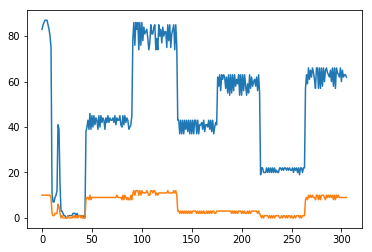

In [78]:
plt.plot(sum((list(df.br)  for df in dfs), []))
plt.plot(sum((list(df.ir)  for df in dfs), []))